In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('tweets.csv',encoding='utf-8')
df.head(10)

,tweet,topic
0,@sssdddnnn333 @MohammedAlDeaye حارس حتى عنده ض...,Sports
1,RT @fahadaljehani: الكثير من المتعة كانت حاضره...,Sports
2,RT @aboaljorya: @AhmedAllshehri عذيب 👀\nالسعر ...,Business
3,RT @salem_d29: الحمدلله ، شعوري لا يوصف ، ولن ...,Sports
4,أبل أبدعت بهذي الميزة الأمر مستحيل ومجرد خيال ...,Technology
5,5 أزارير اضافية مسابقة مستقبلTECH مستقبلTECH,Technology
6,نظرة سيارتين كهربائية iD4 iD6 فولكسفاجن شدني س...,Technology
7,فايروس خطير جدا يستهدف مستخدمي نظام الاندرويد ...,Technology
8,حسيت نفسي . شركة سجنال الاماراتية - استحوذوا و...,Technology
9,ازرار إضافية مسابقة مستقبلTECH,Technology


In [6]:
print('Date Size',df.shape)

Date Size (26747, 2)


C:\Users\user\AppData\Local\Temp\ipykernel_3008\1287044560.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='topic', order=topic_counts.index, palette='viridis')


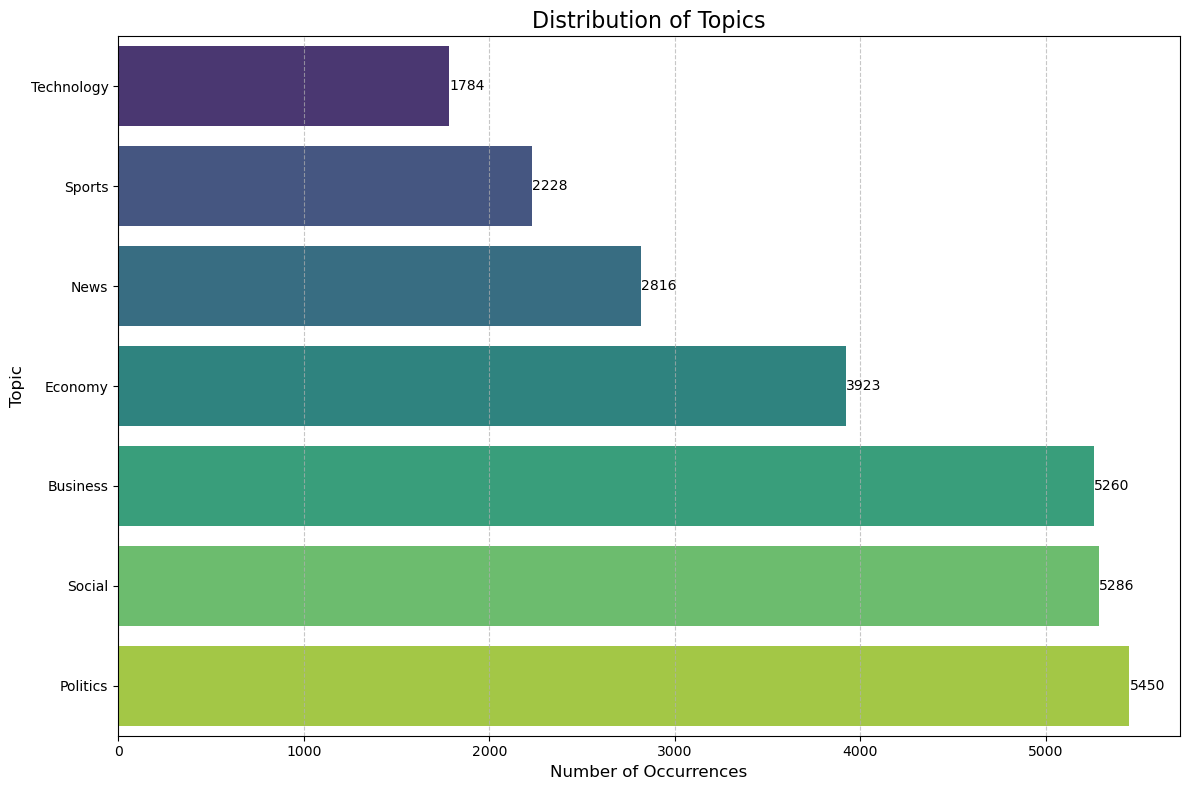

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(12, 8)) # Slightly larger for better label visibility
plt.title("Distribution of Topics", fontsize=16) # More descriptive title, larger font

# Calculate counts and sort them for better visualization
topic_counts = df['topic'].value_counts().sort_values(ascending=True)

# Create the countplot using sorted data
sns.countplot(data=df, y='topic', order=topic_counts.index, palette='viridis')

plt.xlabel("Number of Occurrences", fontsize=12) # Label the x-axis
plt.ylabel("Topic", fontsize=12) # Label the y-axis (though 'topic' is often self-explanatory here)
plt.grid(axis='x', linestyle='--', alpha=0.7) # Add a horizontal grid for readability

# Add annotations to display counts on the bars
for index, value in enumerate(topic_counts):
    plt.text(value + 0.5, index, str(value), va='center') # Adjust position for clarity

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from snowballstemmer import stemmer
import string

import re 

# Downloads
nltk.download('punkt')
nltk.download('stopwords')

def remove_chars(text, del_chars):
    for char in del_chars:
        text = text.replace(char, "")  # You missed assigning back to `text`
    return text
def remove_repeating_char(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)

def clean_tweet(tweet):
      
    emoj = re.compile("["
            u"\U0001F600-\U0001F64F"  
            u"\U0001F300-\U0001F5FF"  
            u"\U0001F680-\U0001F6FF"  
            u"\U0001F1E0-\U0001F1FF" 
            u"\U00002500-\U00002BEF"  
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  
            u"\u3030"
            u"\u2066"
                        "]+", re.UNICODE)
    
    tweet =  re.sub(emoj, '', tweet)

    
    tweet = re.sub("@[^\s]+","",tweet)
    
    tweet = re.sub("RT","",tweet)
    
    tweet = re.sub(r"(?:\|http?\://|https?\://|www)\S+", "", tweet)
    
    tweet = re.sub(r'[0-9]+', '', tweet)  
    
    tweet = remove_chars(tweet, "٠١٢٣٤٥٦٧٨٩")
 
    
    arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
    
    english_punctuations = string.punctuation
    
    punctuations_list = arabic_punctuations + english_punctuations
    tweet = remove_chars(tweet, punctuations_list)
     
    tweet = remove_repeating_char(tweet)
    
    tweet = tweet.replace('\n', ' ')  
      
    tweet = tweet.strip(' ')  
    return tweet


<>:47: SyntaxWarning: invalid escape sequence '\s'
<>:47: SyntaxWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_3008\2319230238.py:47: SyntaxWarning: invalid escape sequence '\s'
  tweet = re.sub("@[^\s]+","",tweet)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def tokenizingText(text):
    tokens_list = word_tokenize(text)
    return tokens_list

def filteringText(tokens_list):
    
    listStopwords = stopwords.words('arabic')
    filtered = []
    for txt in tokens_list:
        if txt not in listStopwords:
            filtered.append(txt)
    return filtered

def stemmingText(tokens_list): 
    
    ar_stemmer = stemmer("arabic")
    tokens_list = [ar_stemmer.stemWord(word) for word in tokens_list]
    return tokens_list
    
def toSentence(words_list):  
    sentence = ' '.join(word for word in words_list)
    return sentence

In [15]:
def process_tweet(tweet):
    
    tweet=clean_tweet(tweet)
    
    tokens_list=tokenizingText(tweet)
    
    tokens_list=filteringText(tokens_list)
    
    tokens_list=stemmingText(tokens_list)
    return tokens_list

In [16]:
text= "أنا أحب الذهاب إلى الحديقة 🌝، كل يوم 9 صباحاً، مع رفاقي هؤلاء! @toto  "

processed_tweet= process_tweet(text)
print(processed_tweet)

['احب', 'ذهاب', 'حديق', 'يوم', 'صباح', 'رفاق']


In [18]:
df['tweet'] = df['tweet'].apply(process_tweet)
df

,tweet,topic
0,"[حارس, عند, ضعف, نظر, مدر, يحرص, عموم, حال, حا...",Sports
1,"[كثير, متع, كان, حاضر, ملعب, قيم, الفن, عاليه,...",Sports
2,"[عذيب, سعر, حال]",Business
3,"[حمدلله, شعور, يوصف, ولن, انسي, فضل, جمهور, هل...",Sports
4,"[ابل, ابدع, بهذ, ميز, امر, مستحيل, مجرد, خيال,...",Technology
...,...,...
26742,"[خير, سحب, مبلغ, الاف, ولم, تخرج, صراف, طريق, ...",Business
26743,"[صرف, ادو, ياخذ, اسبوع, لاسبوع, والادو, باق, ا...",Business
26744,"[جيت, قدم, لاغ, يوم, رقع, اسعار, تطبيق, مشكل, ...",Business
26745,"[حال, توف, مريض, مستشفي, حق, مطالب, ماليه, نرج...",Business


In [20]:
from imblearn.over_sampling import RandomOverSampler 
oversampler = RandomOverSampler() 

tweets,Y = oversampler.fit_resample(df,df.topic)


C:\Users\user\AppData\Local\Temp\ipykernel_3008\3466409223.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tweets, y='topic', order=topic_counts.index, palette='viridis')


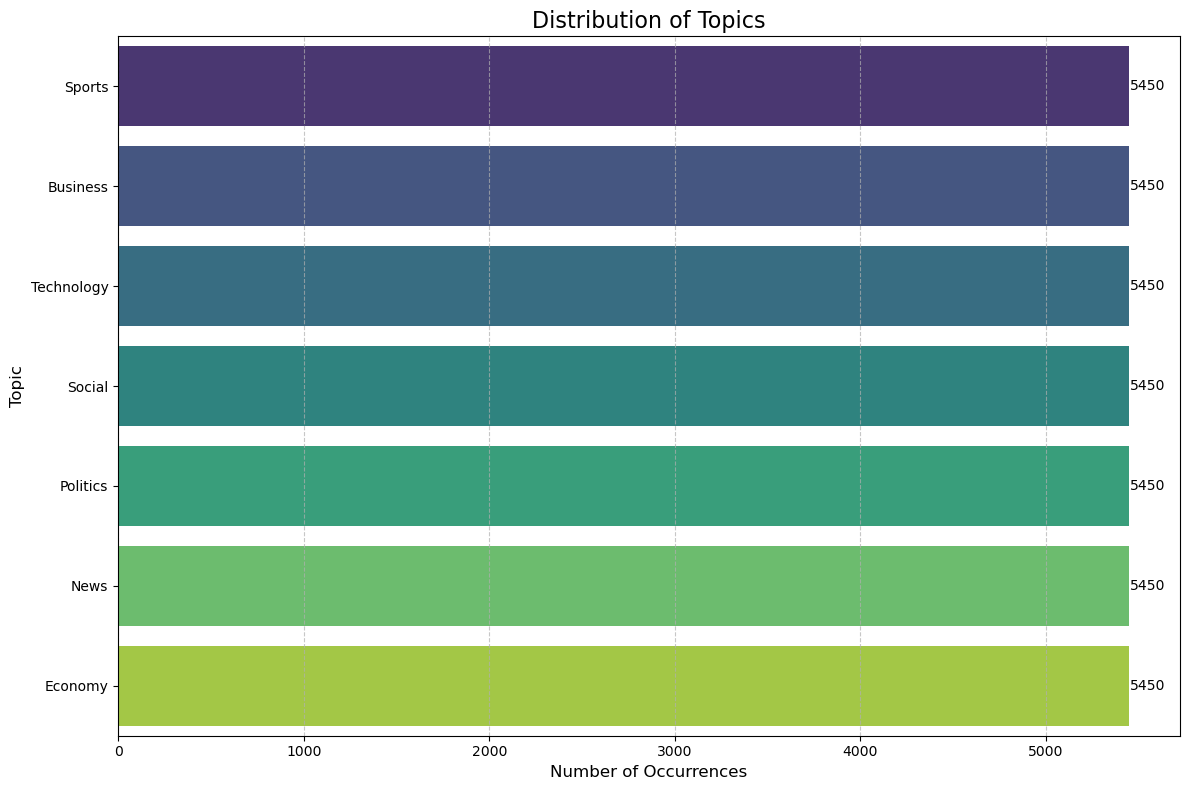

In [21]:
plt.figure(figsize=(12, 8)) # Slightly larger for better label visibility
plt.title("Distribution of Topics", fontsize=16) # More descriptive title, larger font

# Calculate counts and sort them for better visualization
topic_counts = Y.value_counts().sort_values(ascending=True)

# Create the countplot using sorted data
sns.countplot(data=tweets, y='topic', order=topic_counts.index, palette='viridis')

plt.xlabel("Number of Occurrences", fontsize=12) # Label the x-axis
plt.ylabel("Topic", fontsize=12) # Label the y-axis (though 'topic' is often self-explanatory here)
plt.grid(axis='x', linestyle='--', alpha=0.7) # Add a horizontal grid for readability

# Add annotations to display counts on the bars
for index, value in enumerate(topic_counts):
    plt.text(value + 0.5, index, str(value), va='center') # Adjust position for clarity

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

In [25]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

# tweets['topic'] = tweets['topic'].apply(lambda x: le.fit_transform(x))
tweets['topic_encoded'] = le.fit_transform(tweets['topic'])

classes = le.classes_ 
n_classes = len(classes)

print("Num. of Classes: ",n_classes)
print(f"Classes Names: {classes}")
print(f'coding: {le.transform(classes)}')


Num. of Classes:  7
Classes Names: ['Business' 'Economy' 'News' 'Politics' 'Social' 'Sports' 'Technology']
coding: [0 1 2 3 4 5 6]


In [26]:
tweets

,tweet,topic,topic_encoded
0,"[حارس, عند, ضعف, نظر, مدر, يحرص, عموم, حال, حا...",Sports,5
1,"[كثير, متع, كان, حاضر, ملعب, قيم, الفن, عاليه,...",Sports,5
2,"[عذيب, سعر, حال]",Business,0
3,"[حمدلله, شعور, يوصف, ولن, انسي, فضل, جمهور, هل...",Sports,5
4,"[ابل, ابدع, بهذ, ميز, امر, مستحيل, مجرد, خيال,...",Technology,6
...,...,...,...
38145,"[ايفون, اخضر, مطفي, وين, جديد]",Technology,6
38146,"[يارب, تكون, حلت, مشكل, دفع, ابل, با, لان, اخر...",Technology,6
38147,"[طيب, خاصيه, عند, اربع, اشهر, مو, جديد]",Technology,6
38148,"[سلام, علي, اخو, انا, عند, سناب, جوال, سناب, م...",Technology,6


In [27]:
sentences = tweets['tweet'].apply(lambda x: toSentence(x))

In [28]:
sentences

0        حارس عند ضعف نظر مدر يحرص عموم حال حال لاعب هل...
1        كثير متع كان حاضر ملعب قيم الفن عاليه سالمالدو...
2                                             عذيب سعر حال
3        حمدلله شعور يوصف ولن انسي فضل جمهور هلال عل شخ...
4        ابل ابدع بهذ ميز امر مستحيل مجرد خيال سنة ايبا...
                               ...                        
38145                             ايفون اخضر مطفي وين جديد
38146    يارب تكون حلت مشكل دفع ابل با لان اخر تحديث تع...
38147                      طيب خاصيه عند اربع اشهر مو جديد
38148    سلام علي اخو انا عند سناب جوال سناب مشهور متاب...
38149                 وش فروق او مواصف بسيط بين بين ال Pro
Name: tweet, Length: 38150, dtype: object

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer() 
tokenizer.fit_on_texts(sentences)

num_words = len(tokenizer.word_counts)
print(f'Numer of words : {num_words}')


Numer of words : 21984


In [33]:
max_words = 10000 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(sentences)
X= tokenizer.texts_to_sequences(sentences)
X[0],X[1]

([2809, 48, 1717, 224, 1407, 6302, 2934, 164, 164, 717, 2, 4154, 4506, 164],
 [289, 2120, 239, 3410, 3411, 184, 305, 9291, 9292, 509, 1943, 6303, 155])

In [34]:
max_len = 50 
X = pad_sequences(X,maxlen=max_len)

In [35]:
X[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,  289, 2120,  239, 3410, 3411,  184,  305,
       9291, 9292,  509, 1943, 6303,  155])

In [36]:
y = tweets['topic_encoded']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [42]:
from keras.models import Sequential

from keras.layers import Embedding, Dense, LSTM

embed_dim = 32
hidden_unit = 16
dropout_rate = 0.2

# model = Sequential()

# model.add(Embedding(input_dim = max_words, output_dim = embed_dim, input_length = max_len))

# model.add(LSTM(units = hidden_unit, dropout=dropout_rate))

# model.add(Dense(units = len(classes), activation = 'softmax'))
# model.compile(loss = 'sparse_categorical_crossentropy', 
#               optimizer = 'adam', metrics = ['accuracy'])
# model.summary()
model = Sequential()

# Explicitly define input_shape for the first layer
# The input to the Embedding layer is a 2D tensor of (batch_size, input_length)
# where input_length is the sequence length.
model.add(Embedding(input_dim=max_words, output_dim=embed_dim, input_length=max_len))

model.add(LSTM(units=hidden_unit, dropout=dropout_rate))

model.add(Dense(units=n_classes, activation='softmax')) # Use len_classes here

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(X_train, y_train,
                             epochs=10, batch_size=32,
                             validation_data=(X_test, y_test))

Epoch 1/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.6162 - loss: 1.2155 - val_accuracy: 0.8797 - val_loss: 0.4031
Epoch 2/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9117 - loss: 0.3094 - val_accuracy: 0.9067 - val_loss: 0.3163
Epoch 3/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9529 - loss: 0.1716 - val_accuracy: 0.9156 - val_loss: 0.3067
Epoch 4/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9672 - loss: 0.1225 - val_accuracy: 0.9189 - val_loss: 0.3166
Epoch 5/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9761 - loss: 0.0850 - val_accuracy: 0.9172 - val_loss: 0.3292
Epoch 6/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9822 - loss: 0.0651 - val_accuracy: 0.9191 - val_loss: 0.3502
Epoch 7/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9851 - loss: 0.0544 - val_accuracy: 0.9205 - val_loss: 0.3651
Epoch 8/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9846 - loss: 0.0528 - 

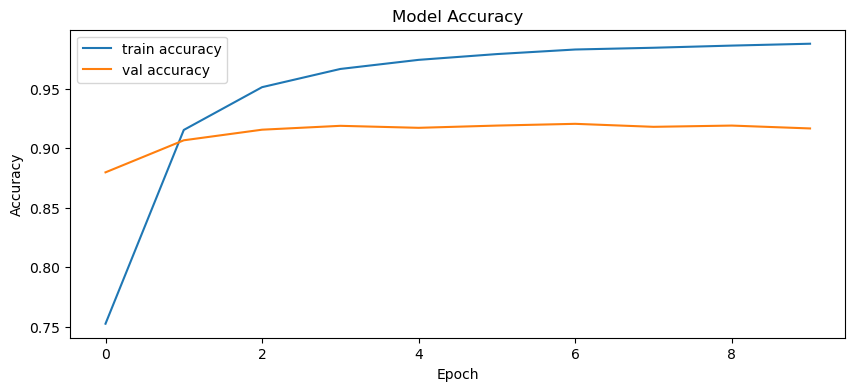

In [45]:
fig, ax = plt.subplots(figsize = (10, 4))

ax.plot(history.history['accuracy'], label = 'train accuracy')
ax.plot(history.history['val_accuracy'], label = 'val accuracy')

ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')

plt.show()

In [46]:
model.save('perosn_classification_model.keras')

import pickle
tokenizer_path = 'perosn_classification_tokenizer'
with open(tokenizer_path, 'wb') as file:
    pickle.dump(tokenizer, file)

In [47]:
import numpy as np

def classify_tweet(tweet, model, tokenizer, max_len=50):
    
    seq = tokenizer.texts_to_sequences([tweet])
    
    pseq = pad_sequences(seq, maxlen=max_len)
    
    predections = model.predict(pseq)
    
    pred=np.argmax(predections)
    return pred

In [49]:
from keras.models import load_model
import pickle
classes= ['Business', 'Economy', 'News', 'Politics', 'Social', 'Sports', 'Technology']

def classify_person(person_name,model_path, tokenizer_path, person_path):
    
    model = load_model(model_path)
    
    with open(tokenizer_path, 'rb') as file:
        tokenizer = pickle.load(file)
    
    df = pd.read_csv(person_path)
    
    classes_count=dict()
    
    for i in range(len(classes)):
        key=classes[i]
        classes_count[key]=0

    for _, row in df.iterrows():
        tweet=row['tweet']
        
        processed_tweet=process_tweet(tweet)
        
        code= classify_tweet(processed_tweet, model, tokenizer)
        
        topic=classes[code]
        
        classes_count[topic]=classes_count[topic]+1
 

    x = classes_count.keys()
    y = classes_count.values()

    import matplotlib.pyplot as plt
    # pie
    plt.figure(figsize=(5,5))
    plt.title(person_name, fontdict = {'fontsize':20})
    plt.pie(y, labels = x,autopct='%1.1f%%')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━

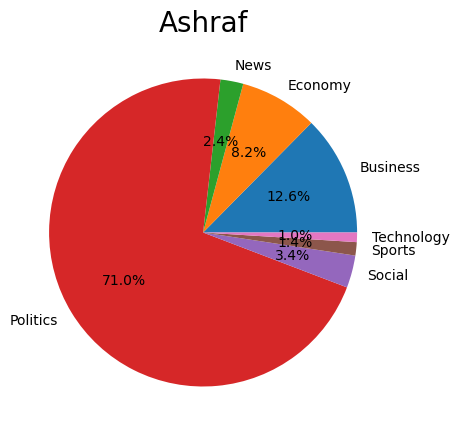

In [50]:
classify_person("Ashraf", 'perosn_classification_model.keras',
                'perosn_classification_tokenizer','ashraf.csv')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━

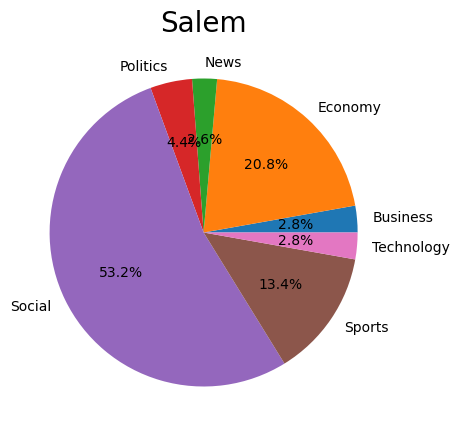

In [51]:
classify_person("Salem",'perosn_classification_model.keras',
                'perosn_classification_tokenizer','salem.csv')